# Keras 이진분류

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# num_words=10000 매개변수는 훈련데이터에서 가장 자주 나타나는 단어 1만개만 사용하겠다는 의미

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
print(train_labels[0])

1


In [5]:
print(max(max(sequence) for sequence in train_data))

9999


In [10]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

* 신경망에 숫자 리스트를 주입할 수는 없음 → 리스트를 텐서로 변환

  * 같은 길이가 되도록 리스트에 패딩(padding)을 추가하고 (samples, sequence_length) 크기의 정수 텐서로 변환 → 정수 텐서를 다룰 수 있는 층 (Embedding)을 신경망의 첫번째 층으로 사용

  * 리스트를 원-핫 인코딩(one-hot encoding)하여 0과 1의 벡터로 변환 → 부동 소수 벡터데이터를 다룰 수 있는 Dense 층을 신경망의 첫번째 층으로 사용

In [12]:
# 정수 시퀸스를 이진 행렬로 인코딩
import numpy as np

def vectorize_sequences(seqs, dim=10000):
  results = np.zeros((len(seqs), dim))
  for i, seq in enumerate(seqs) :
    results[i, seq] = 1.                 # 특정 인덱스의 위치를 1.으로 만듦(부정소수점)
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [50]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

* 신경망 모델 만들기
  * 입력 데이터가 벡터, 레이블은 스칼라(0 또는 1)
  * 이런 문제에 잘 작동하는 네트워크 종류는 relu 활성화 함수를 사용한 완전연결층(Dense(16, activation='relu'))을 그냥 쌓은 것
  * 매개변수 16은 은닉유닛(hidden unit)의 개수 → 가중치 행렬 W의 크기가(input_dimension, 16) → 입력 데이터와 W를 점곱하면 입력 데이터가 16차원으로 표현된 공간으로 투영
  * 표현 공간의 차원 → 신경망이 내재된 표현을 학습할 때 가질 수 있는 자유도

* 은닉유닛을 늘리면 (표현공간을 더 고차원으로 만들면) 신경망이 더 복잡한 표현을 학습할 수 있음 → 계산 비용이 커지고 원하지 않는 패턴을 학습할 수도 있음 (훈련데이터에서는 성능이 향상되지만 테스트 데이터에서는 그렇지 않은 패턴)

* Dense층을 쌓을 때 두가지 중요한 구조상 결정이 필요
  * 얼마나 많은 층을 사용
  * 각 층에 얼마나 많은 은닉유닛을 사용

In [20]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

* 손실함수와 옵티마이저를 선택
  * 이진분류 문제고 신경망의 출력이 확률이므로 네트워크의 마지막에 시그모이드 활성화함수를 사용한 하나의 유닛으로 된 층을 사용 → binary crossentropy 손실함수가 적합
  * MSE도 사용할 수 있음
  * 확률을 출력하는 모델을 사용할 때는 크로스엔트로피가 최선의 선택

* rmsprop 옵티마이저와 binary_crossentropy 손실함수로 모델을 설정

* 훈련하는 동안 정확도를 사용하여 모니터링

In [21]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
from keras import optimizers
model.compile(optimizer=keras.optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [36]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [26]:
from keras import losses
from keras import metrics

model.compile(optimizer=keras.optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


* 훈련 검증

  * 훈련하는 동안 처음 본 데이터에 대한 모델의 정확도를 측정하기 위해 원본 훈
련데이터에서 10000개의 샘플을 떼어 검증 세트를 만듬

In [27]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

* 모델을 512개의 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련시킴(x_train과 t_train 텐서에 있는 모든 샘플에 대해 20번 반복)

* 동시에 따로 떼어놓은 1만개의 샘플에서 손실과 정확도를 측정

In [29]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=50, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/50
30/30 [==============================] - 3s 57ms/step - loss: 0.4938 - accuracy: 0.7941 - val_loss: 0.3637 - val_accuracy: 0.8726
Epoch 2/50
30/30 [==============================] - 1s 38ms/step - loss: 0.2921 - accuracy: 0.9053 - val_loss: 0.3055 - val_accuracy: 0.8826
Epoch 3/50
30/30 [==============================] - 1s 38ms/step - loss: 0.2144 - accuracy: 0.9321 - val_loss: 0.2811 - val_accuracy: 0.8895
Epoch 4/50
30/30 [==============================] - 1s 38ms/step - loss: 0.1738 - accuracy: 0.9435 - val_loss: 0.3224 - val_accuracy: 0.8705
Epoch 5/50
30/30 [==============================] - 1s 38ms/step - loss: 0.1395 - accuracy: 0.9562 - val_loss: 0.2832 - val_accuracy: 0.8875
Epoch 6/50
30/30 [==============================] - 1s 38ms/step - loss: 0.1154 - accuracy: 0.9642 - val_loss: 0.3119 - val_accuracy: 0.8816
Epoch 7/50
30/30 [==============================] - 1s 38ms/step - loss: 0.0967 - accuracy: 0.9730 - val_loss: 0.3369 - val_accuracy: 0.8772
Epoch 8/50
30

* modle.fit() 메서드는 History 객체를 반환 -> 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리인 history 속성을 가지고 있음

In [33]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

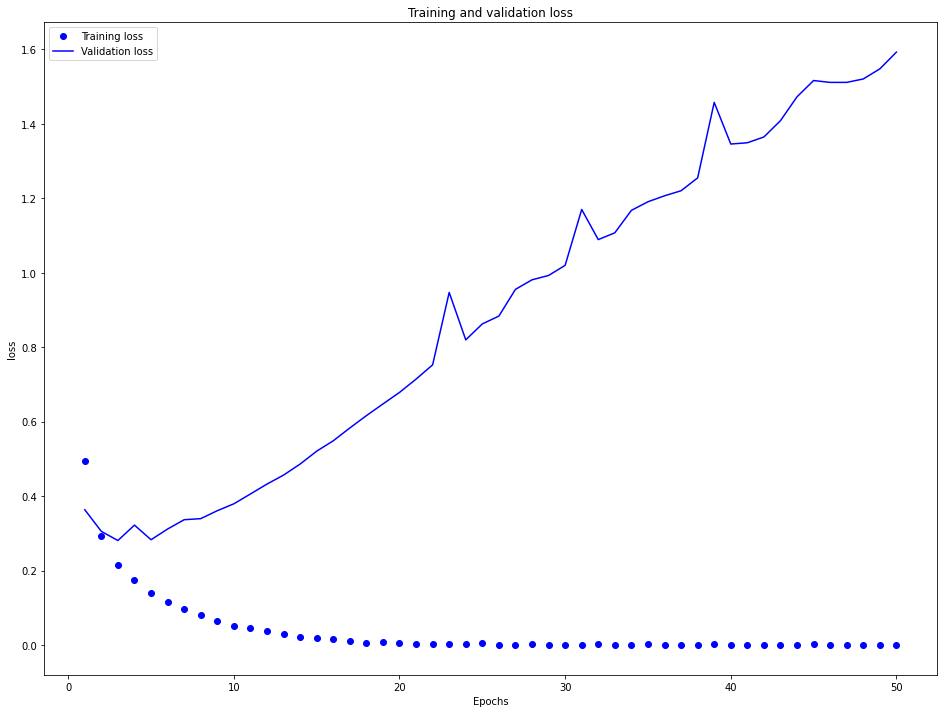

In [35]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(16,12))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

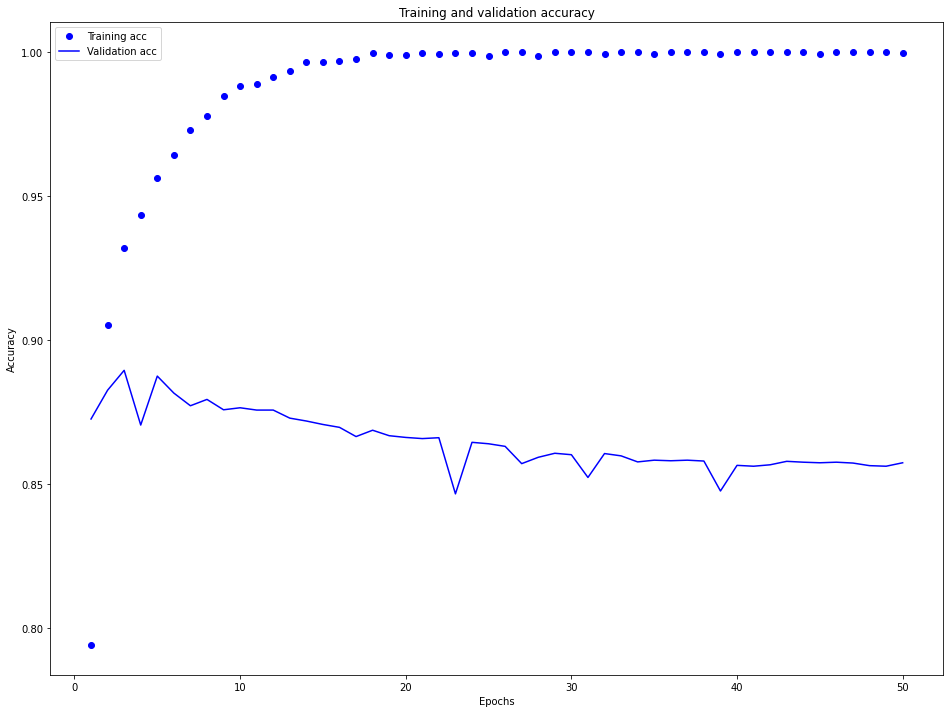

In [45]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(16,12))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

* 훈련손실이 에포크마다 감소하고 훈련정확도는 에포크마다 증가
* 경사 하강법 최적화를 사용했을 때 반복마다 최소화되는 것이 손실이므로 기대와 동일
* 검증 손실과 검증 정확도는 훈련손실/정확도와 같지 않음 → 4번째 에포크에서 역전
* 훈련세트에서 잘 작동하는 모델이 처음 보는 데이터에서는 잘 작동하지 않는 예 → 과대적합(overfitting) → 훈련데이터에 과도하게 최적화되어 훈련데이터에 특화된 표현을 학습하므로 훈련세트 이외의 데이터에는 일반화되지 못함
* 훈련데이터에 대해 성능이 향상됨에 따라 신경망은 과대적합되기 시작 → 이전에 본 적 없는 데이터에서는 결과가 점점 나빠짐 → 항상 훈련세트 이외의 데이터에서 성능을 모니터링 해야 함
* 과대적합을 방지하기 위해 세번째 에포크 이후에 훈련을 중지할 수 있음

In [46]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 27ms/step - loss: 0.4654 - accuracy: 0.8242
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2700 - accuracy: 0.9101
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2080 - accuracy: 0.9256
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2979 - accuracy: 0.8819


In [47]:
print(results)

[0.29785168170928955, 0.8819199800491333]


In [48]:
# 훈현된 모델로 새로운 데이터에 대해 예측
model.predict(x_test)

array([[0.236227  ],
       [0.9999387 ],
       [0.94591355],
       ...,
       [0.14606884],
       [0.11073336],
       [0.66035515]], dtype=float32)

# 추가실험

* 1개 또는 3개의 은닉층을 사용
* 층의 은닉 유닛을 추가하거나 줄여보기 eg) 32개 또는 64개
* binary_crossentropy 대신 mse 사용
* Activation함수로 relu 대신 tanh 사용
  * 로이터 뉴스를 46개의 상호 배타적 토픽으로 분류 → 다중분류
    * 로이터 데이터셋
    * 1986년 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합 
    * 46개의 토픽
    * 각 토픽은 훈련세트에 최소한 10개의 샘플을 가지고 있음

In [52]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [53]:
print(len(train_data))
print(len(test_data))

8982
2246


In [54]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [56]:
print(train_labels[0])    #index로 0~45사이의 정수

3


## 데이터 준비

* 데이터를 벡터로 변환

In [57]:
import numpy as np

def vectorize_sequences(seqs, dim=10000):
  results = np.zeros((len(seqs), dim))
  for i, seq in enumerate(seqs):
    results[i,seq] = 1.   #특정 인덱스의 위치를 1. 으로 만듦
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

* 레이블을 벡터로 변환 → one-hot encoding이 범주형 데이터에 널리 사용

In [93]:
def to_one_hot(labels, dim=46):
  results = np.zeros((len(labels),dim))
  for i, l in enumerate(labels):
    results[i, l] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [66]:
# 위 코드와 같은 방법
# from keras.utils.np_utils import to_categorical

# one_hot_train_labels = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)

## 모델 구성
* 영화리뷰와 비슷해 보이나 출력 클래스의 개수가 2개에서 46개로 늘어남 → 출력 공간의 차원이 훨씬 커짐
* Dense층을 쌓으면 각 층은 이전 층의 출력에서 제공한 정보만 사용 가능
* 한 층이 분류문제에 필요한 일부 정보를 누락하면 그 다음 층에서 이를 복원할 수 없음 → 각 층은 정보의 병목(bottleneck)이 될 수 있음
* 영화리뷰에선 16차원을 가진 중간층 사용 → 16차원 공간은 46개 클래스를 구분하기에 제약이 많을거 같음

In [94]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

* 마지막 Dense층의 크기가 46 → 각 입력 샘플에 대해 46차원의 벡터를 출력. 이 벡터의 각 원소는 각기 다른 출력 클래스가 인코딩 된 것
* 마지막 층에 softmax 활성화 함수 사용 → 각 입력 샘플마다 46개의 출력클래스에 대한 확률 분포를 출력. 46차원 출력벡터를 만들며 output[i]는 어떤 샘플이 클래스 i에 속할 확률. 46개 값을 모두 더하면 1이 됨
• 이런 문제에 사용할 최선의 손실함수는 categorical_crossentropy

In [95]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## 훈련 검증
* 훈련 데이터에서 1000개의 샘플을 따로 떼어 검증세트로 사용

In [96]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [97]:
import numpy as np
print(np.shape(train_data), np.shape(train_labels), np.shape(x_val), np.shape(partial_x_train), np.shape(y_val), np.shape(partial_y_train))

(8982,) (8982,) (1000, 10000) (7982, 10000) (1000, 46) (7982, 46)


* 20번의 에포크로 모델을 훈련

In [98]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 58ms/step - loss: 2.7123 - accuracy: 0.5267 - val_loss: 1.8207 - val_accuracy: 0.6390
Epoch 2/20
16/16 [==============================] - 1s 42ms/step - loss: 1.4715 - accuracy: 0.7016 - val_loss: 1.3555 - val_accuracy: 0.6970
Epoch 3/20
16/16 [==============================] - 1s 42ms/step - loss: 1.0816 - accuracy: 0.7672 - val_loss: 1.1629 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 1s 43ms/step - loss: 0.8580 - accuracy: 0.8201 - val_loss: 1.0528 - val_accuracy: 0.7840
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.6908 - accuracy: 0.8558 - val_loss: 0.9831 - val_accuracy: 0.7910
Epoch 6/20
16/16 [==============================] - 1s 43ms/step - loss: 0.5627 - accuracy: 0.8849 - val_loss: 0.9527 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 1s 41ms/step - loss: 0.4512 - accuracy: 0.9077 - val_loss: 0.9082 - val_accuracy: 0.8120
Epoch 8/20
16

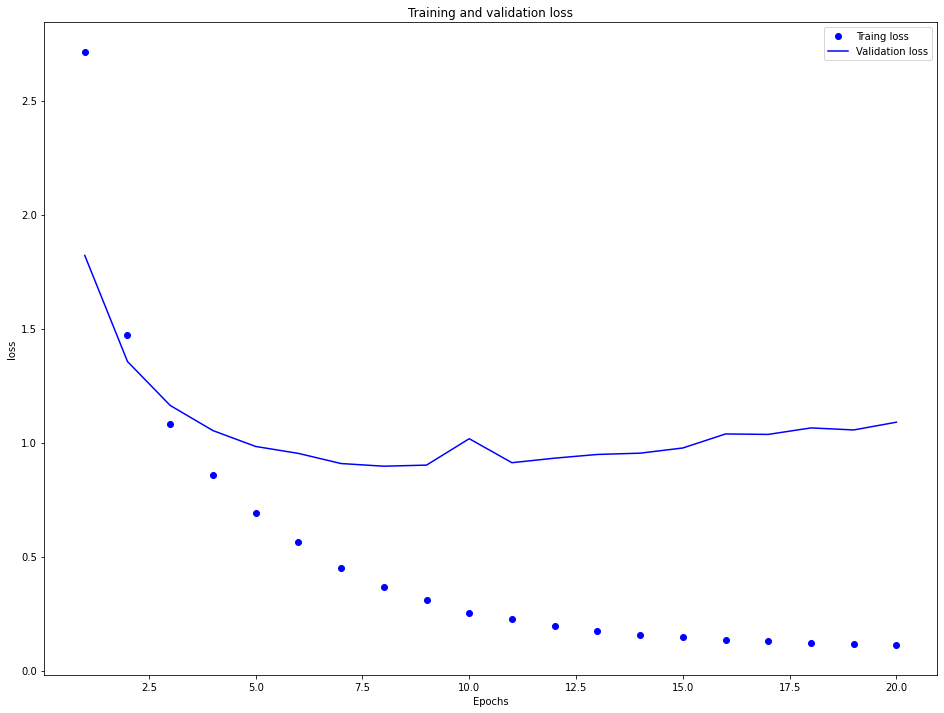

In [103]:
# 손실과 정확도 곡선

import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(16,12))
plt.plot(epochs, loss, 'bo', label='Traing loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

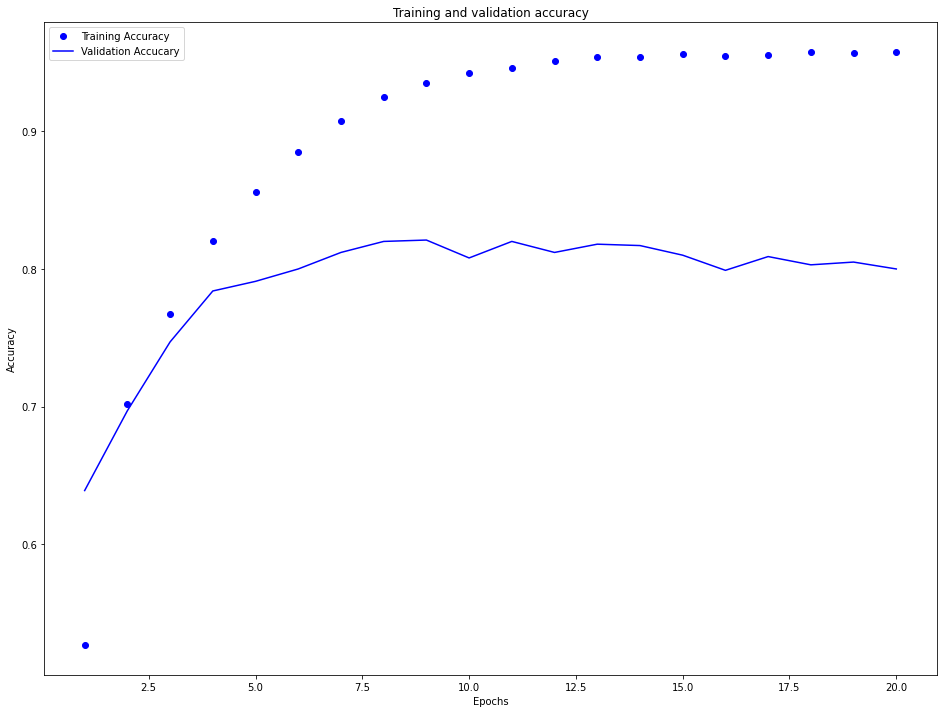

In [104]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(16,12))
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accucary')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

* 9번째 에포크에서 과대적합 시작 -> 9번의 에포크로 새로운 모델을 훈련

In [105]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/9
16/16 [==============================] - 1s 39ms/step - loss: 2.5635 - accuracy: 0.5289
Epoch 2/9
16/16 [==============================] - 1s 40ms/step - loss: 1.4400 - accuracy: 0.7022
Epoch 3/9
16/16 [==============================] - 1s 39ms/step - loss: 1.0728 - accuracy: 0.7692
Epoch 4/9
16/16 [==============================] - 1s 39ms/step - loss: 0.8427 - accuracy: 0.8192
Epoch 5/9
16/16 [==============================] - 1s 40ms/step - loss: 0.6688 - accuracy: 0.8589
Epoch 6/9
16/16 [==============================] - 1s 40ms/step - loss: 0.5298 - accuracy: 0.8919
Epoch 7/9
16/16 [==============================] - 1s 39ms/step - loss: 0.4246 - accuracy: 0.9168
Epoch 8/9
16/16 [==============================] - 1s 40ms/step - loss: 0.3419 - accuracy: 0.9298
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 1.0114 - accuracy: 0.7850
[1.0113677978515625, 0.7849510312080383]


* 새로운 데이터 예측

In [106]:
predictions = model.predict(x_test)

In [107]:
predictions[0].shape

(46,)

In [108]:
np.sum(predictions[0])

0.99999994

In [109]:
np.argmax(predictions[0])

3

* 충분히 큰 중간층을 두어야 하는 이유
  * 마지막 출력이 46차원 → 중간층의 히든 유닛이 46보다 많이 적어서는 안됨

In [111]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/9
16/16 [==============================] - 1s 39ms/step - loss: 3.5253 - accuracy: 0.0059
Epoch 2/9
16/16 [==============================] - 1s 40ms/step - loss: 3.0008 - accuracy: 0.1381
Epoch 3/9
16/16 [==============================] - 1s 39ms/step - loss: 2.5270 - accuracy: 0.4049
Epoch 4/9
16/16 [==============================] - 1s 39ms/step - loss: 2.0966 - accuracy: 0.5380
Epoch 5/9
16/16 [==============================] - 1s 38ms/step - loss: 1.7800 - accuracy: 0.5777
Epoch 6/9
16/16 [==============================] - 1s 39ms/step - loss: 1.5800 - accuracy: 0.5837
Epoch 7/9
16/16 [==============================] - 1s 39ms/step - loss: 1.4523 - accuracy: 0.5890
Epoch 8/9
16/16 [==============================] - 1s 40ms/step - loss: 1.3591 - accuracy: 0.5910
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 1.5926 - accuracy: 0.6011
[1.592592477798462, 0.6010685563087463]
